<a href="https://colab.research.google.com/github/zannah57/Challenge_Build/blob/main/GreenHouse_Gas_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Building a National Greenhouse Gas Emission Model to Compare Emissions, Identify Trends, and Forecast future Emissions.**

## Overview
This project focuses on Development of Machine Learning Model to Forecast Emissions, identify trends, and compare emissions for Nation to effectively understand, predict, and manage its greenhouse gas emissions across various industries and gases.

## Objective
Develop a machine learning model using Ensemble Technique **STACKING** to forecast Greenhouse Gas emissions. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.



##Step 1: Define the Problem

The problem we're addressing is how a nation can effectively understand, predict, and manage its greenhouse gas emissions across various industries and gases to achieve environmental sustainability and public health goals.

## How can Developing a Machine Learning Model to Forecast Greenhouse Gas Emissions can benefit a nation?

Developing a machine learning model for emissions forecasting offers a nation significant benefits by providing data-driven insights for informed policymaking and targeted interventions. By accurately predicting future emission levels, governments can proactively set realistic reduction targets, allocate resources effectively for mitigation strategies, and track progress towards environmental goals. Identifying trends in emissions across different sectors and gases allows for the pinpointing of major contributing sources and the evaluation of the impact of existing regulations. Furthermore, comparing emissions across industries enables the identification of best practices and opportunities for cross-sector learning, fostering a more efficient and equitable transition towards a low-carbon economy, ultimately enhancing environmental sustainability and public health.







## Step 2: Data Collection
I've gathered dataset suitable for greenhouse gas emissions forecast. The dataset used in this project contains various features related to the Project.


In [ ]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/10fucaJzgiedYSzGuo28qZ35VysdmhHrE/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,Industry,Gas Type,Scale,Year,Emission,Year.1,Emission.1,Year.2,Emission.2,Year.3,...,Year.56,Emission.56,Year.57,Emission.57,Year.58,Emission.58,Year.59,Emission.59,Year.60,Emission.60
0,1. Energy,Carbon dioxide,Units,1970,28.322040,1971,41.870022,1972,54.452475,1973,...,2026,NaN,2027,NaN,2028,NaN,2029,NaN,2030,NaN
1,1. Energy,Greenhouse gas,Units,1970,154.718002,1971,168.306329,1972,202.811542,1973,...,2026,NaN,2027,NaN,2028,NaN,2029,NaN,2030,NaN
2,1. Energy,Methane,Units,1970,124.922380,1971,124.911505,1972,146.750550,1973,...,2026,NaN,2027,NaN,2028,NaN,2029,NaN,2030,NaN
3,1. Energy,Nitrous oxide,Units,1970,1.473582,1971,1.524802,1972,1.608517,1973,...,2026,NaN,2027,NaN,2028,NaN,2029,NaN,2030,NaN
4,1.A. Fuel Combustion Activities,Carbon dioxide,Units,1970,5.699088,1971,5.699088,1972,6.844628,1973,...,2026,NaN,2027,NaN,2028,NaN,2029,NaN,2030,NaN


## Step 3: Exploratory Data Analysis (EDA)

Visualizing the distribution of the target variable (Gas Type) and inspect the data types of each column.

Gas Type
Greenhouse gas       25
Carbon dioxide       21
Nitrous oxide        20
Methane              19
Not Applicable       15
Fluorinated gases     6
Name: count, dtype: int64
Industry
Not Applicable                                         25
2. Industrial Processes and Product Use                 5
1. Energy                                               4
1.A. Fuel Combustion Activities                         4
1.A.3. Transport                                        4
1.A.3.A. Domestic Aviation                              4
1.A.1. Energy Industries                                4
1.A.2. Manufacturing Industries and Construction        4
1.A.3.C. Railways                                       4
1.A.3.B. Road Transportation                            4
1.A.4. Buildings and other Sectors                      4
1.A.3.D. Domestic Navigation                            4
1.B. Fugitive Emissions from Fuels                      4
4. Land-use, land-use change and forestry               4


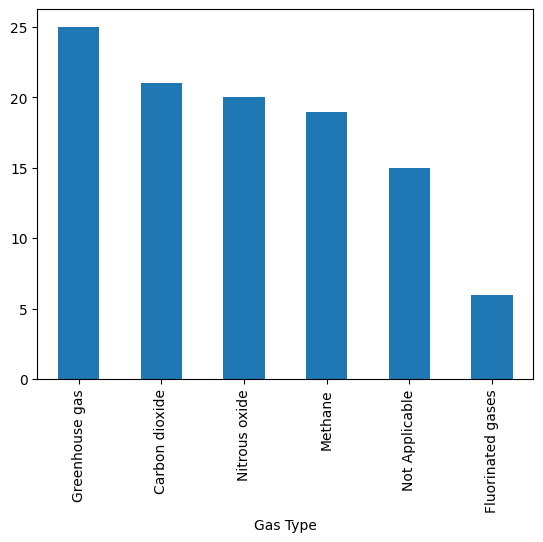

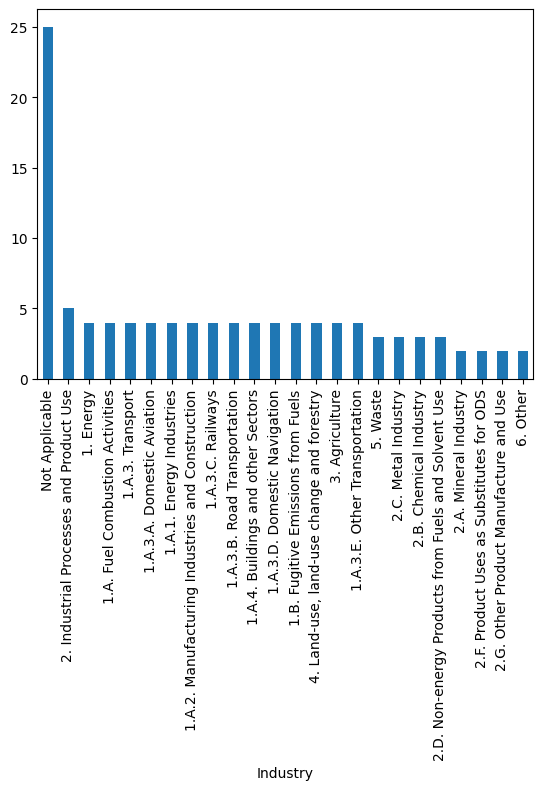

,0
Industry,object
Gas Type,object
Scale,object
Year,int64
Emission,float64
...,...
Emission.58,float64
Year.59,int64
Emission.59,float64
Year.60,int64


In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
print(df['Gas Type'].value_counts())
print(df['Industry'].value_counts())

df['Gas Type'].value_counts().plot(kind='bar')
plt.show()
df['Industry'].value_counts().plot(kind='bar')
plt.show()

# Display data types
df.dtypes

In [ ]:
df.shape

(106, 125)

## Step 4: Data Preprocessing

Preprocess the data to clean, transform, and prepare it for modeling.


In [ ]:
# impute missing value with mean
from sklearn.model_selection import train_test_split
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

# Select numerical columns (excluding the target 'Emission' if it has no missing values)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
# Remove 'Emission' from numerical columns if you don't want to impute it with the mean
if 'Emission' in numerical_cols and df['Emission'].isnull().sum() == 0:
    numerical_cols.remove('Emission')

# Impute missing values with the mean for numerical columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Verify that missing values are imputed
missing_values_after = df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)

# Re-run the preprocessing steps after imputation
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['Gas Type', 'Industry', 'Scale'])

# Define features (X) and target (y)
X = df_encoded.drop('Emission', axis=1)
y = df_encoded['Emission']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nOriginal data shape:", df.shape)
print("Encoded data shape:", df_encoded.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Missing values before imputation:
 Industry       0
Gas Type       0
Scale          0
Year           0
Emission       0
              ..
Emission.58    0
Year.59        0
Emission.59    0
Year.60        0
Emission.60    0
Length: 125, dtype: int64

Missing values after imputation:
 Industry       0
Gas Type       0
Scale          0
Year           0
Emission       0
              ..
Emission.58    0
Year.59        0
Emission.59    0
Year.60        0
Emission.60    0
Length: 125, dtype: int64

Original data shape: (106, 125)
Encoded data shape: (106, 153)
Training features shape: (84, 152)
Testing features shape: (22, 152)
Training target shape: (84,)
Testing target shape: (22,)


## Step 5: Training Base Models.
Train Models (Linear Regression, Random Forest) with Stacking Technique on the preprocessed data.

###Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train a Linear Regression model
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

# make predictions
expected = y_test
predicted = model.predict(x_test)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R-squared:", r2)

# Compare Linear Regression predictions with expected
print("\nLinear Regression Predictions vs. Expected:")
for p, e in zip(predicted[::5], expected[::5]):
 print(f'predicted: {p:.2f}, expected: {e}')

Linear Regression - Mean Squared Error: 0.0013705909019926011
Linear Regression - R-squared: 0.9999855427557852

Linear Regression Predictions vs. Expected:
predicted: 8.17, expected: 8.17126708
predicted: 19.96, expected: 20.06424272345833
predicted: 0.10, expected: 0.100467532
predicted: 19.96, expected: 20.06424272345833
predicted: 0.87, expected: 0.86204194


###Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# make predictions with Random Forest
rf_predicted = rf_model.predict(x_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predicted)
rf_r2 = r2_score(y_test, rf_predicted)
print("\nRandom Forest Regression - Mean Squared Error:", rf_mse)
print("Random Forest Regression - R-squared:", rf_r2)

# Compare Random Forest predictions with expected
print("\nRandom Forest Predictions vs. Expected:")
for p, e in zip(rf_predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e}')


Random Forest Regression - Mean Squared Error: 4.320472482815837
Random Forest Regression - R-squared: 0.9544268638319794

Random Forest Predictions vs. Expected:
predicted: 7.51, expected: 8.17126708
predicted: 20.00, expected: 20.06424272345833
predicted: 0.17, expected: 0.100467532
predicted: 19.99, expected: 20.06424272345833
predicted: 0.93, expected: 0.86204194


## Step 6: Training Meta-Model(Stacking Model).

This involves training a meta-model on the predictions of the base models.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Define base models
estimators = [
    ('lr', make_pipeline(StandardScaler(), LinearRegression())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Create the Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

# Train the Stacking model
stacking_model.fit(x_train, y_train)

# Make predictions with the Stacking model
stacking_predicted = stacking_model.predict(x_test)

# Evaluate the Stacking model
stacking_mse = mean_squared_error(y_test, stacking_predicted)
stacking_r2 = r2_score(y_test, stacking_predicted)
print("\nStacking Regressor - Mean Squared Error:", stacking_mse)
print("Stacking Regressor - R-squared:", stacking_r2)

# Compare Stacking predictions with expected
print("\nStacking Predictions vs. Expected:")
for p, e in zip(stacking_predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e}')


Stacking Regressor - Mean Squared Error: 0.0016945788875296396
Stacking Regressor - R-squared: 0.9999821252710911

Stacking Predictions vs. Expected:
predicted: 8.20, expected: 8.17126708
predicted: 20.00, expected: 20.06424272345833
predicted: 0.13, expected: 0.100467532
predicted: 20.00, expected: 20.06424272345833
predicted: 0.90, expected: 0.86204194


In [ ]:
# Create an empty DataFrame with the same columns as the training data
future_data = pd.DataFrame(columns=X_train.columns)

# Populate the future data with hypothetical values
future_year = 2050
future_industry = '1. Energy'
future_gas_type = 'methane', 'nitrous oxide', 'hydrogen', 'propane', 'unspecified'

# Initialize a row with zeroes
new_row = pd.Series(0, index=X_train.columns)

# Set the year
if 'Year' in new_row.index:
    new_row['Year'] = future_year
# Set the one-hot encoded columns based on future values
if f'Industry_{future_industry}' in new_row.index:
    new_row[f'Industry_{future_industry}'] = 1
if f'Gas Type_{future_gas_type}' in new_row.index:
    new_row[f'Gas Type_{future_gas_type}'] = 1

# Append the new row to the future_data DataFrame
# Use concat for newer pandas versions
future_data = pd.concat([future_data, pd.DataFrame([new_row])], ignore_index=True)


# For 'Year', make sure it's the correct type
if 'Year' in future_data.columns:
     future_data['Year'] = future_data['Year'].astype(X_train['Year'].dtype)


# Make sure the columns are in the same order as the training data
future_data = future_data[X_train.columns]


# Predict future emissions using the best performing model (let's assume Stacking was best)
future_emission_prediction = stacking_model.predict(future_data)

print(f"\nPredicted emission for {future_gas_type} at {future_industry} in {future_year}: {future_emission_prediction[0]:.2f}")


Predicted emission for ('methane', 'nitrous oxide', 'hydrogen', 'propane', 'unspecified') at 1. Energy in 2050: 15.85
